# Curly Vector
---
by Yitao LIU 2025-06 

mail: liuyitao97@outlook.com

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import sys
sys.path.append('../')  # Adjust path to include the parent directory
from curlyvector import curly_vector_plot, curly_vector_key

In [2]:
ds = xr.open_dataset('../data/SampleData_curly_vector_NCEP_ltm_uv850hPa_JJA_AsiaMonsoon.nc')
lon = ds['lon'].values
lat = ds['lat'].values
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Convert xarray DataArrays to numpy arrays
u_data = ds['u'].values
v_data = ds['v'].values

# Subsample data for better visualization (every 3rd point)
step = 2
lon_sub = lon_grid[1::step, 1::step]
lat_sub = lat_grid[1::step, 1::step]
u_sub = u_data[1::step, 1::step]
v_sub = v_data[1::step, 1::step]

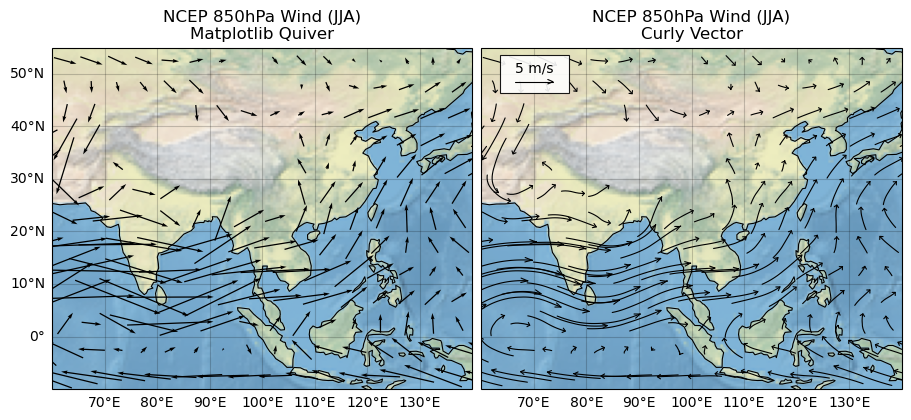

In [3]:
# Matplotlib quiver plot for comparison
fig = plt.figure(figsize=(9, 5), constrained_layout=True)
ax0 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())

ax0.set_title('NCEP 850hPa Wind (JJA)\nMatplotlib Quiver')
ax0.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax0.stock_img()
ax0.set_extent([60, 140, -10, 55], crs=ccrs.PlateCarree())  # Same extent as curly vector plot

# Plot Matplotlib quiver vectors
Q = ax0.quiver(lon_sub, lat_sub, u_sub, v_sub, pivot='mid',
              angles='xy', scale_units='xy', scale=0.67, width=3e-3,
              transform=ccrs.PlateCarree(),
              color='k')

# Add quiver key (legend)
ax0.quiverkey(Q, X=0.1, Y=-0.17, U=5, label='5 m/s', 
             labelpos='N', coordinates='axes',
             fontproperties={'size': 10})

# Add gridlines
ax0.gridlines(draw_labels=['bottom', 'left'], color='k', alpha=0.2)

# Test bidirectional curly vectors (grid points in the middle) - now the default
ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax1.set_title('NCEP 850hPa Wind (JJA)\nCurly Vector')
ax1.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax1.stock_img()
ax1.set_extent([60, 140, -10, 55], crs=ccrs.PlateCarree())

params = {'head_length': 0.5, 'head_width': 0.03, 'linewidth': 0.8, 'scale': 1.5, 'color': 'k'}

# Plot bidirectional curly vectors (now the default curly_vector_plot)
curly_vector_plot(ax1, lon_sub, lat_sub, u_sub, v_sub, 
                 transform=ccrs.PlateCarree(), 
                 **params)

# Add legend with proper parameters
curly_vector_key(ax1, lon_sub, lat_sub, u_sub, v_sub, 
                 key_length=5, label='5 m/s', 
                 loc=[0.08, 0.9], loc_coordinate='axes', 
                 fontsize=10, 
                 box=True, box_size=1.1, 
                 **params)

# Add gridlines
ax1.gridlines(draw_labels=['bottom'], color='k', alpha=0.2)

plt.savefig('quiver_NCEP_850hPa_JJA.png', dpi=200)
plt.show()

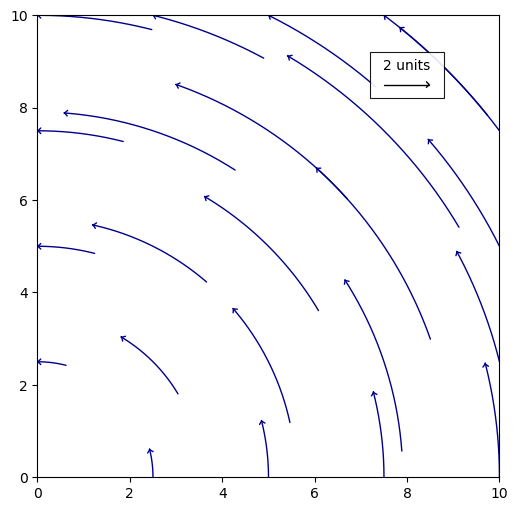

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from curlyvector import curly_vector_plot, curly_vector_key

# Create sample data
x = np.linspace(0, 10, 5)
y = np.linspace(0, 10, 5)
X, Y = np.meshgrid(x, y)
U = -Y  # Circular flow
V = X

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
curly_vector_plot(ax, X, Y, U, V, scale=0.5, color='darkblue')
curly_vector_key(ax, X, Y, U, V, scale=0.5, key_length=2, label='2 units')
plt.savefig('curly_vector_example.png', dpi=200)
plt.show()